# Assigment 01 - Python, Elbow method, and Hierarchical Clustering

> **As usual: The solution is availabe in branch "musterloesung"!**

## Task 1 - Elbow method and Silhouette score

To apply the K-means clustering algorithm, let's load the Palmer Penguins dataset, choose the columns that will be clustered, and use some libs to plot a scatterplot with color-coded clusters.

Download the dataset from here: https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651

Let's import some libraries and load the Penguins dataset, trimming it to the chosen columns and dropping rows with missing data (there were only 2):

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('penguins.csv')
print(df.shape)

df = df[['bill_length_mm', 'flipper_length_mm']]
df = df.dropna(axis=0)
```

Write some code to identify k using the Elbow method and Silhouette score from the lecture.

NOTE: You can simply pass df to KMeans as values!


(344, 9)
   bill_length_mm  flipper_length_mm
0            39.1              181.0
1            39.5              186.0
2            40.3              195.0
4            36.7              193.0
5            39.3              190.0


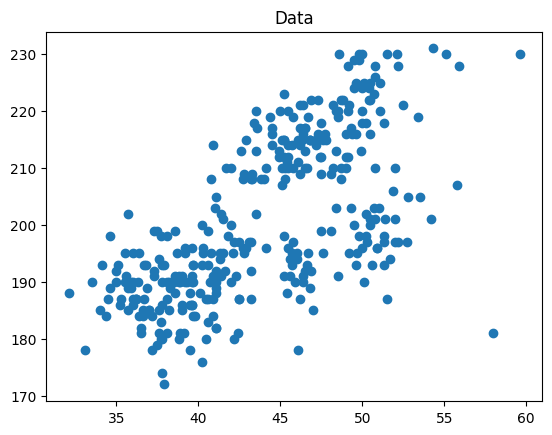

/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

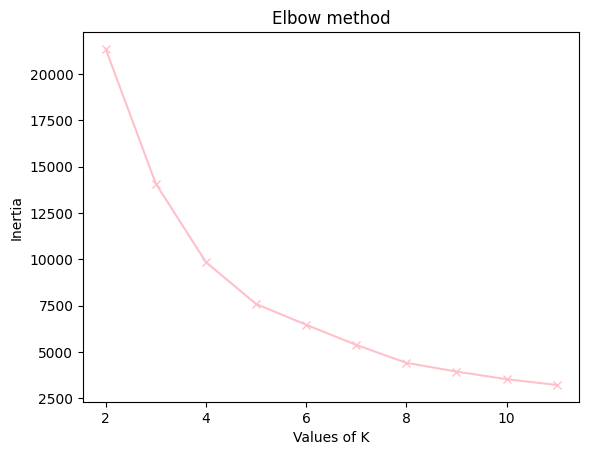

/var/folders/71/gl2n_19n51nbm2sqzk_y4x9r0000gn/T/ipykernel_30311/3042681942.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, silhouette, 'bx-', color='palegreen')


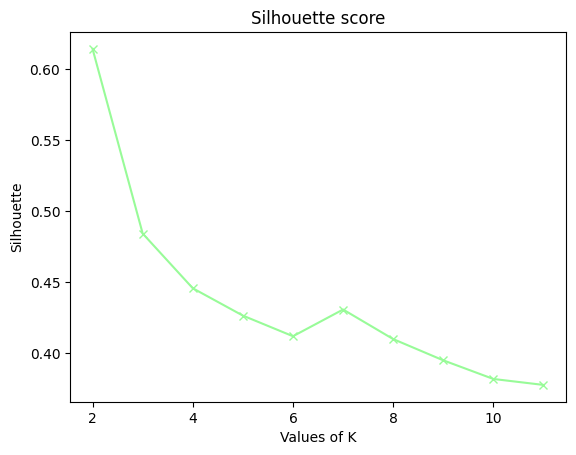

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

df = pd.read_csv('penguins.csv')
print(df.shape)

df = df[['bill_length_mm', 'flipper_length_mm']]
df = df.dropna(axis=0)

print(df.head())
plt.scatter(df.bill_length_mm, df.flipper_length_mm)
plt.title("Data")
plt.show()

K = range(2, 12)
inertias = []
silhouette = []

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels= kmeanModel.fit_predict(df)

    silhouette.append(metrics.silhouette_score(df, cluster_labels))
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-', color='pink')
plt.title("Elbow method")
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.show()

plt.plot(K, silhouette, 'bx-', color='palegreen')
plt.title("Silhouette score")
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.show()

/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


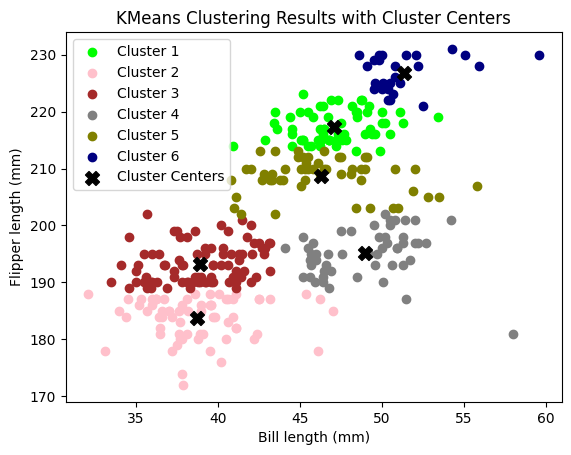

In [49]:
def plot_kmeans_clusters(data, labels, kmeans_model):
    """Plot KMeans clusters with distinct colors and include cluster centers."""
    
    n_clusters = kmeans_model.n_clusters  # Get number of clusters from the model
    
    # Define an extended list of colors for clusters
    colors = [
        "lime", "pink", "brown", "gray", "olive", "navy", "teal",
        "maroon", "gold", "indigo", "coral",
        "g", "r", "c", "b", "k", "m", "y", "orange", "purple",
    ]
    
    # Limit color palette to number of clusters, cycle if necessary
    cluster_colors = colors[:n_clusters] if n_clusters <= len(colors) else colors * (n_clusters // len(colors) + 1)
    
    # Create scatter plot for each cluster
    for cluster in range(n_clusters):
        cluster_points = data[labels == cluster]
        plt.scatter(
            cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
            color=cluster_colors[cluster], label=f'Cluster {cluster + 1}'
        )
    
    # Plot the cluster centers
    centers = kmeans_model.cluster_centers_
    plt.scatter(
        centers[:, 0], centers[:, 1],
        color='black', marker='X', s=100, label='Cluster Centers'
    )
    
    plt.title("KMeans Clustering Results with Cluster Centers")
    plt.xlabel("Bill length (mm)")
    plt.ylabel("Flipper length (mm)")
    plt.legend()
    plt.show()

kmeanModel = KMeans(n_clusters=6)
labels= kmeanModel.fit_predict(df)
plot_kmeans_clusters(df, labels, kmeanModel)


# Silhouette analysis

/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 2  silhouette_score is : 0.6143396539662862
For k = 3  silhouette_score is : 0.4841945371989328
For k = 4  silhouette_score is : 0.445620104194174
For k = 5  silhouette_score is : 0.4276526440750554


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 6  silhouette_score is : 0.4133606764557099
For k = 7  silhouette_score is : 0.43040947404210184


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 8  silhouette_score is : 0.40831866529520355
For k = 9  silhouette_score is : 0.3942201942383754


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 10  silhouette_score is : 0.38158248636378594


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 11  silhouette_score is : 0.37947586777459036


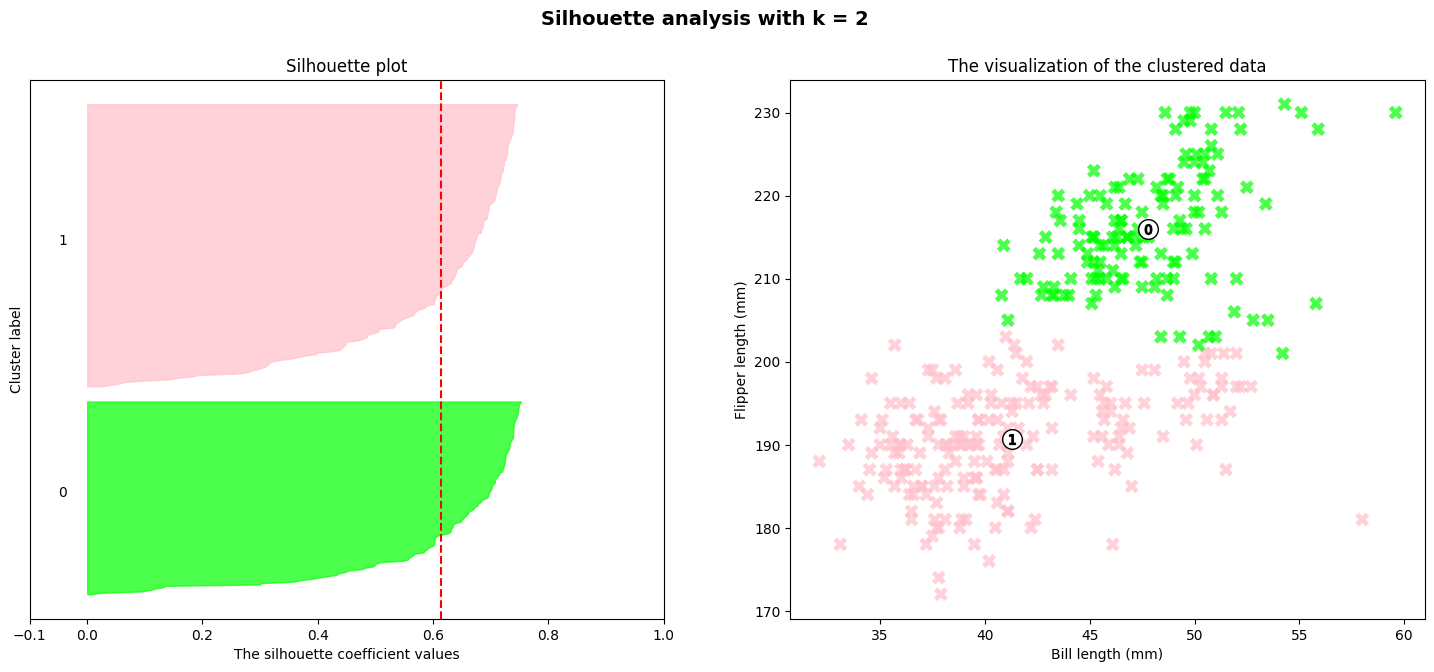

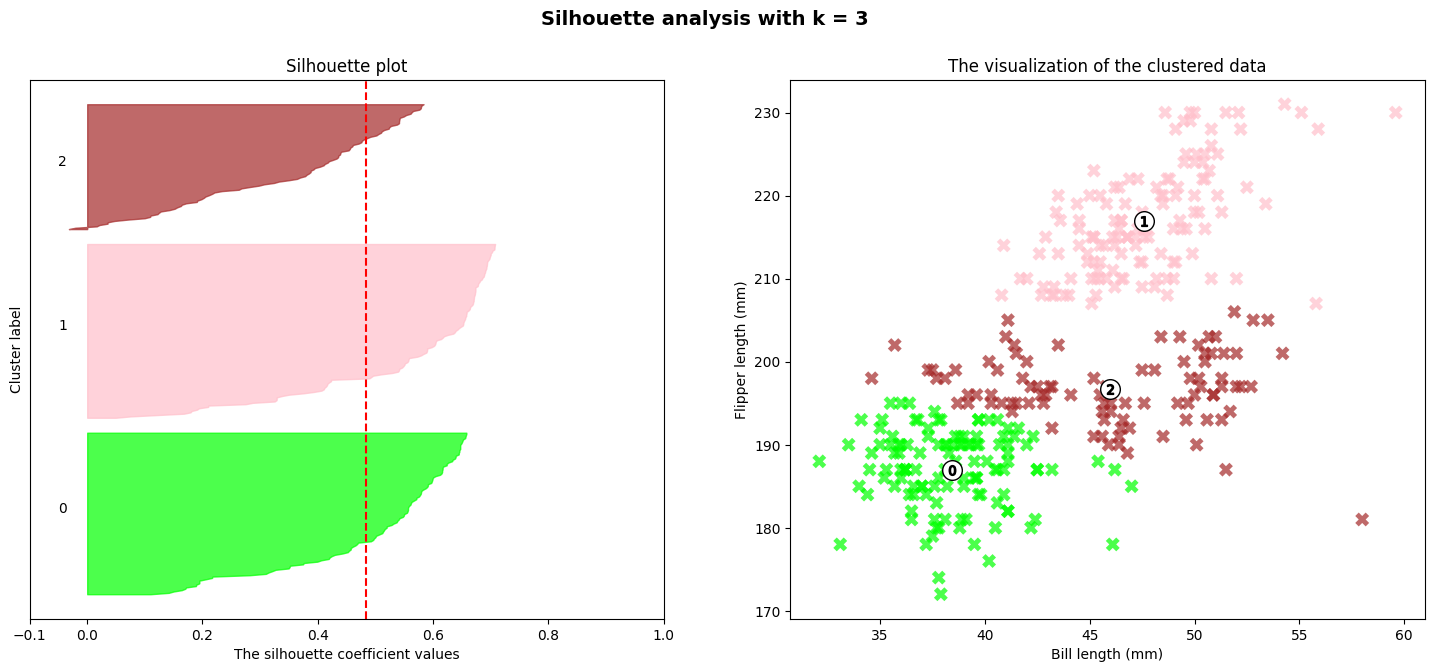

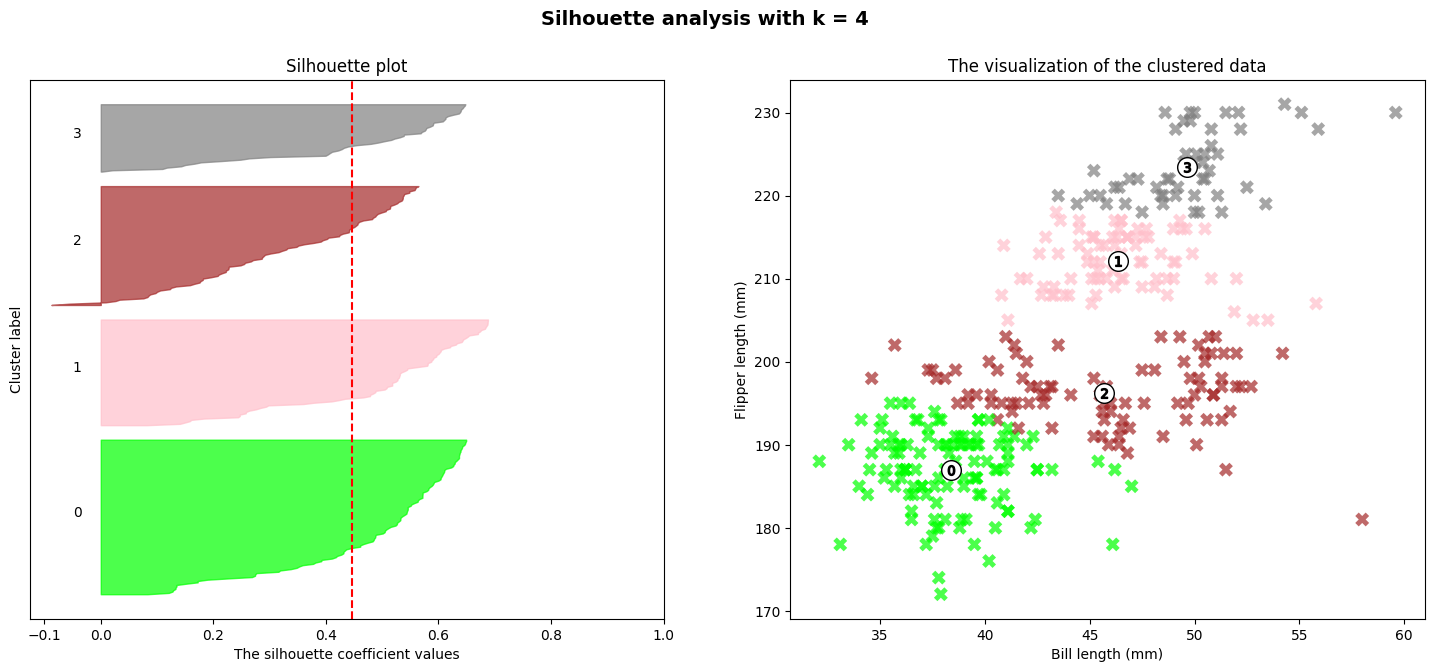

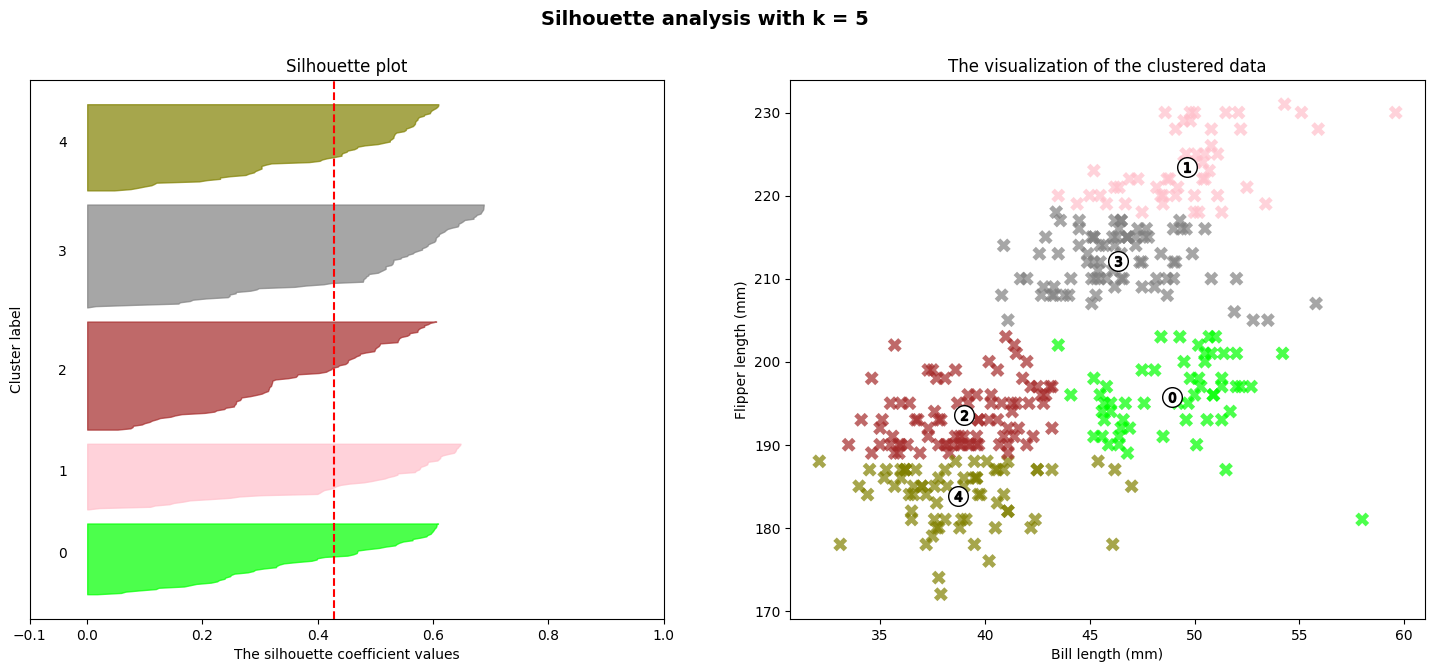

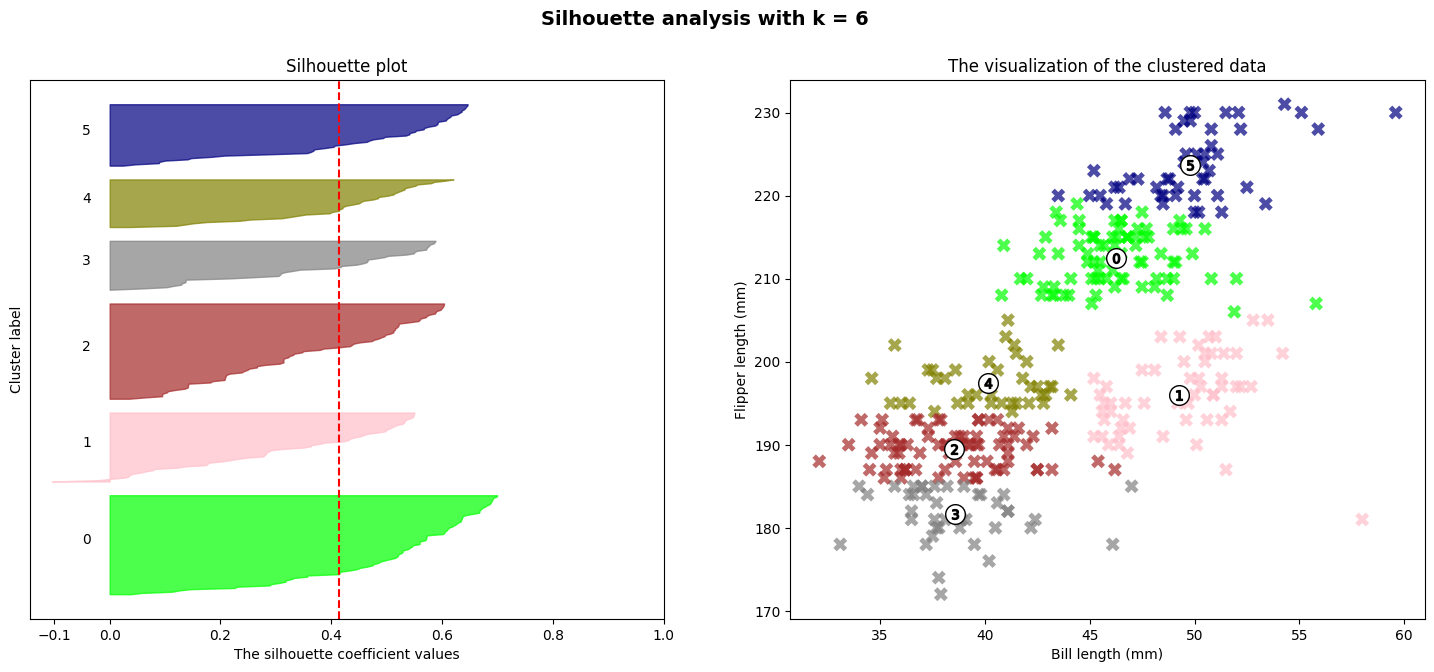

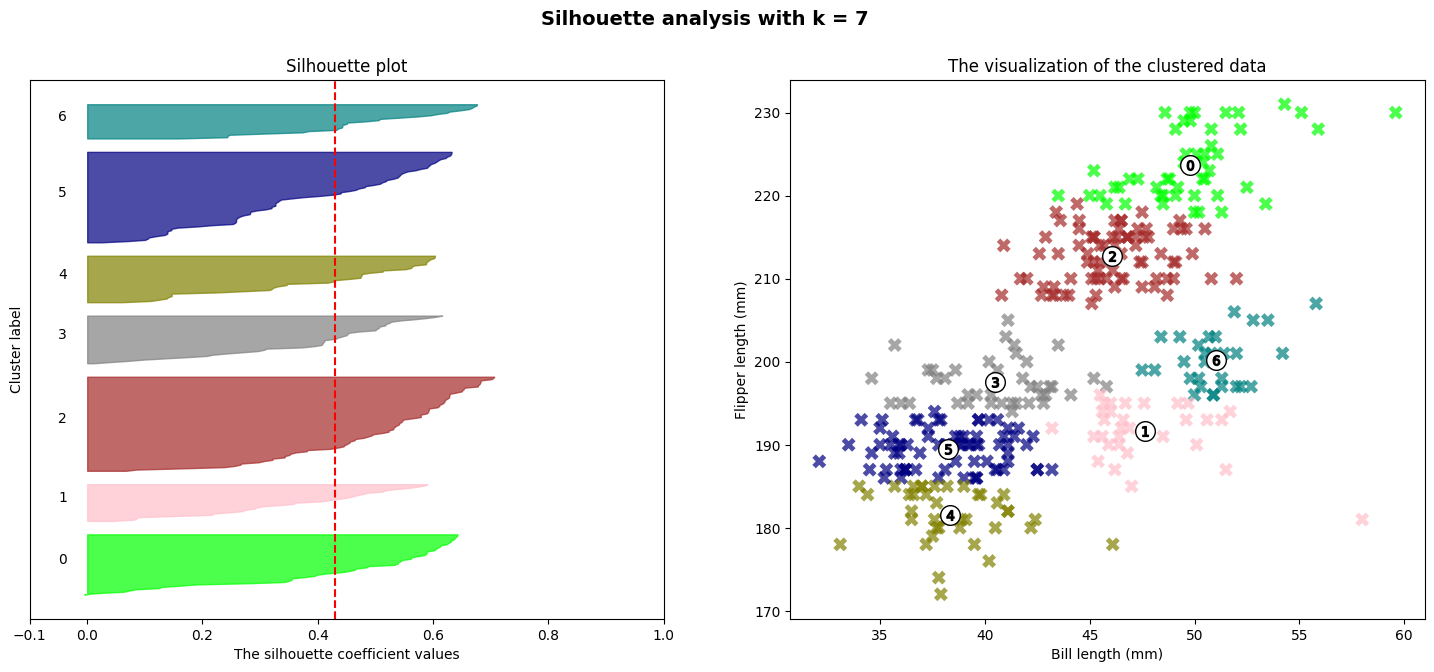

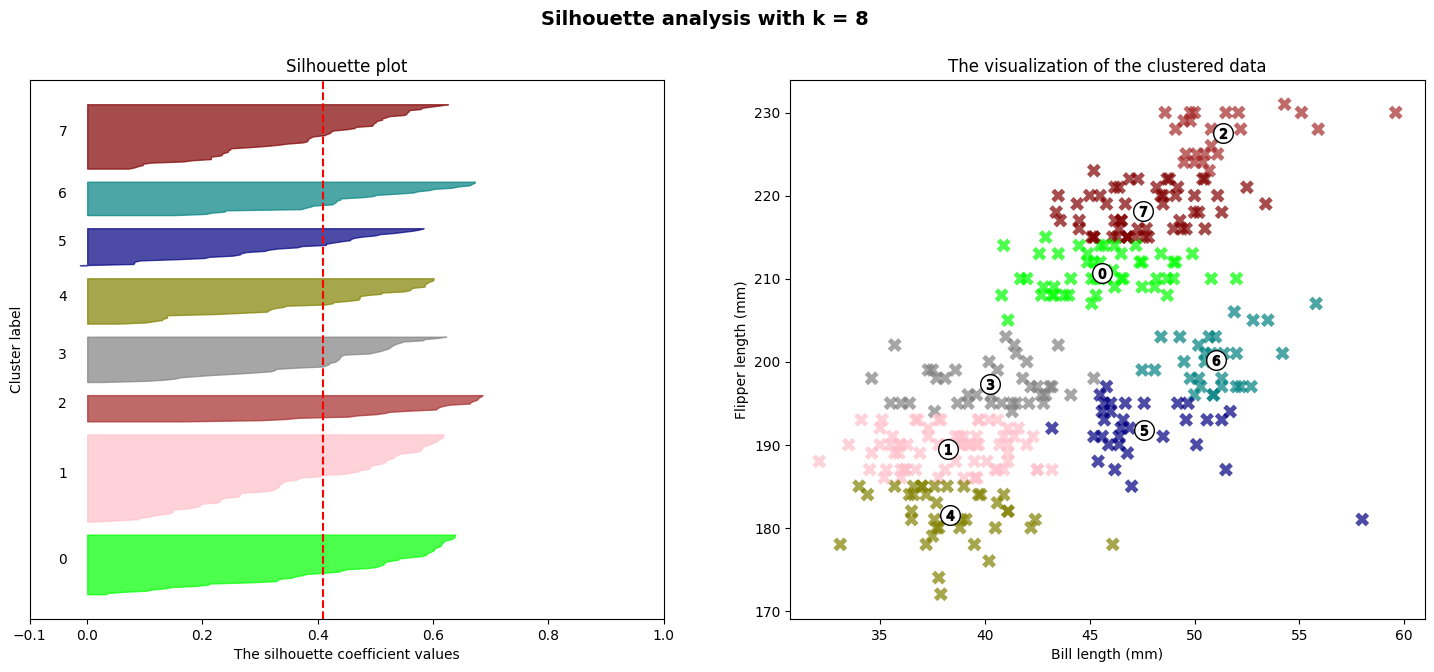

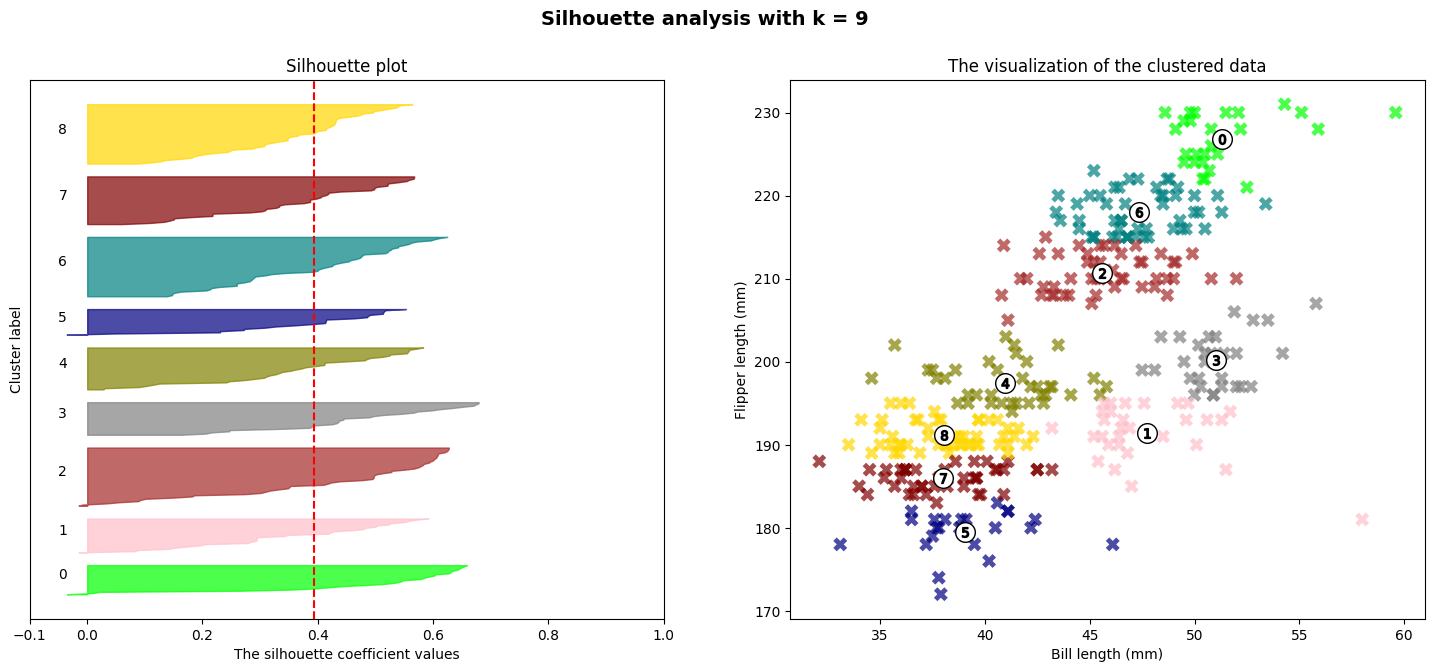

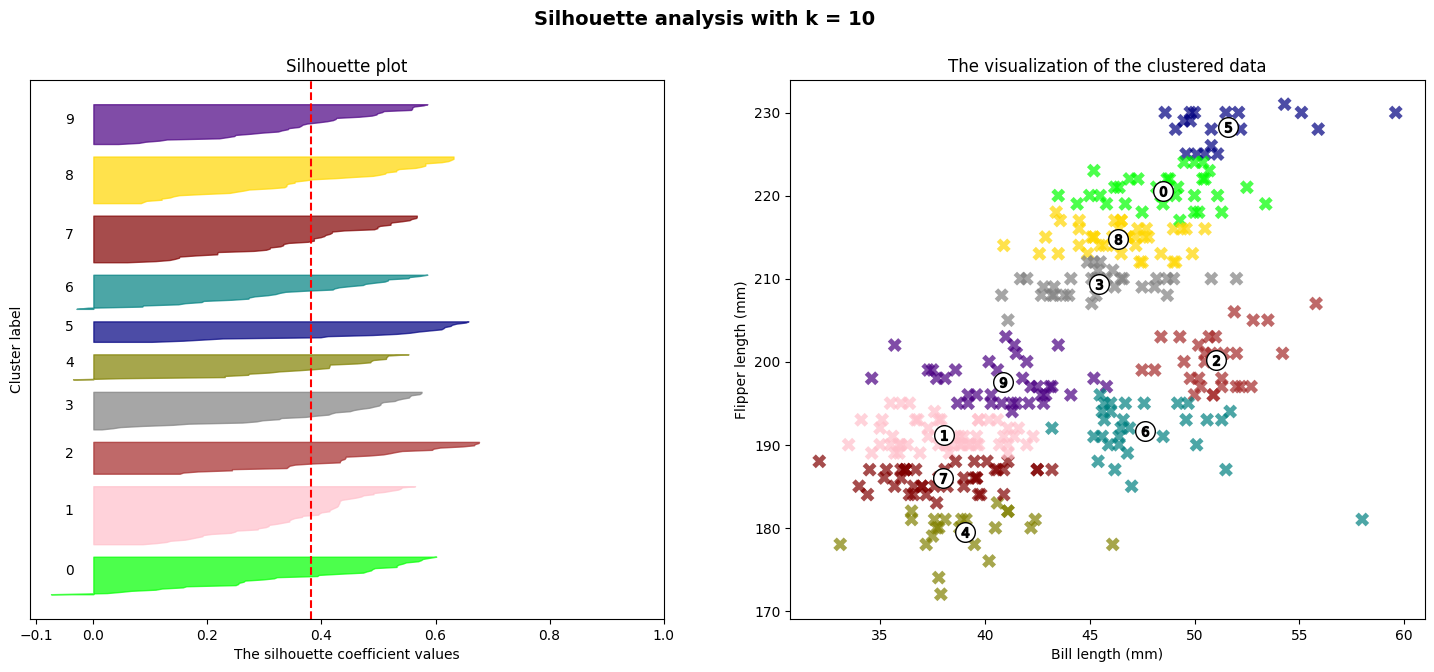

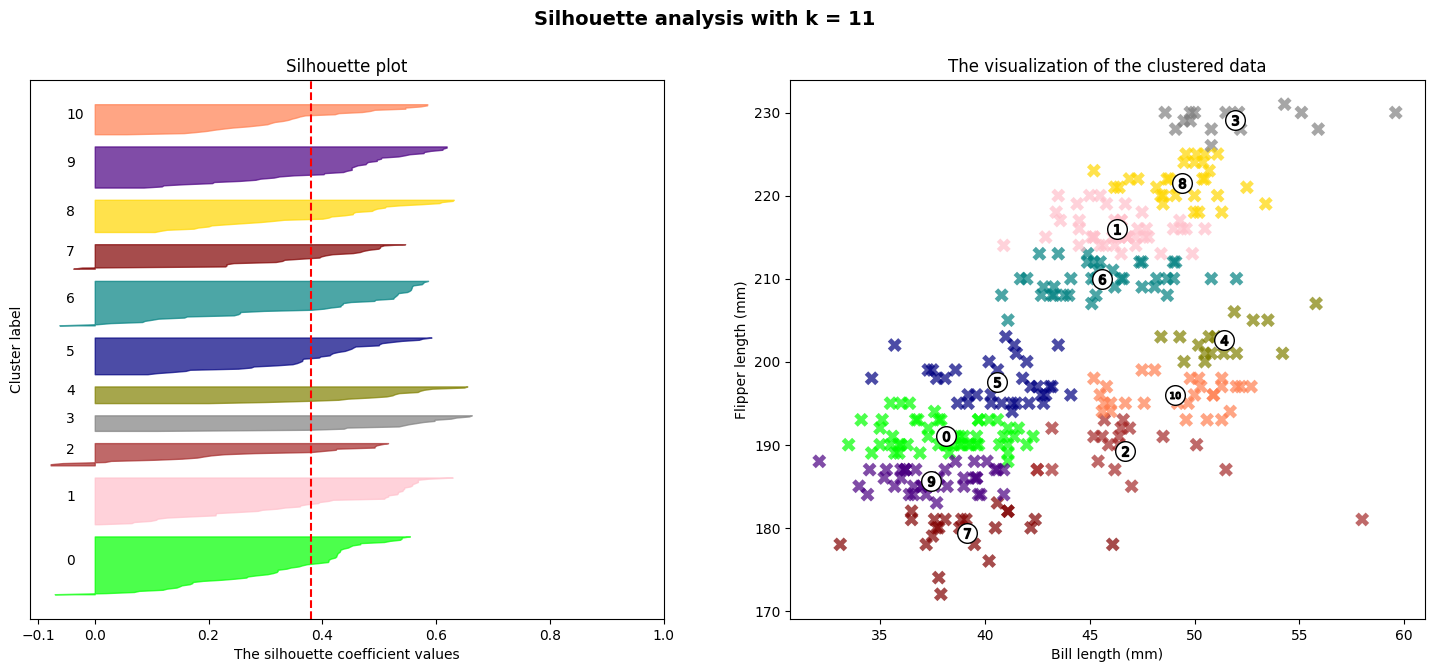

In [50]:
import numpy as np

K = range(2, 12)
colors = [
        "lime", "pink", "brown", "gray", "olive", "navy", "teal",
        "maroon", "gold", "indigo", "coral",
        "g", "r", "c", "b", "k", "m", "y", "orange", "purple",
    ]

X = df.to_numpy()

for k in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(X)

    silhouette = metrics.silhouette_score(X, cluster_labels)
    print("For k =", k," silhouette_score is :", silhouette)

    sample_silhouette_values = metrics.silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colors[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    cm = [colors[i] for i in cluster_labels.astype(int)]

    ax2.scatter( X[:, 0], X[:, 1], marker="X", s=100, lw=0, alpha=0.7, c=cm, edgecolor="k")
    centers = clusterer.cluster_centers_
    ax2.scatter( centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Bill length (mm)")
    ax2.set_ylabel("Flipper length (mm)")

    plt.suptitle("Silhouette analysis with k = %s" %k, fontsize=14, fontweight="bold")

plt.show()
